<a href="https://colab.research.google.com/github/NapsterZ4/qiskit_quantum_code/blob/master/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encabezado**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pip install qiskit

In [250]:
IBMQ.save_account('83566f121e1ee97e533a98ccfb2798b144a8745872daaff2a9fa06eadab636365e78eb38c76bf7984a1609de6c0c8e5afa17dc9a647985deb2f5e4b9d1f91009')
from qiskit import *
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
%matplotlib inline

Credentials already present. Set overwrite=True to overwrite.


# **INTRODUCCION**

# Entrelazamiento cuantico

Cuando una particula tiene afectacion en la otra independientemente de la 

distancia
![Entrelazamiento cuantico](https://drive.google.com/uc?id=1DVcVOcX9pX0QrmehVG5lC3L_tP6-NRkz)

# Superpocicion de estados

Cuando 1 sola particula o mas puede estar en 2 estados en el mismo segmento de tiempo

![Superposicion cuantica](https://drive.google.com/uc?id=1IQXYWsdaSyeyK2r8pfvaZ0rzv1FC0iJ-)

Aqui es donde encontramos las desigualdades de Bell

![Desigualdades de Bell](https://drive.google.com/uc?id=1Og731gLrvK6qW3XWyhaH6VhaNqnt0bou)

Esfera de Bloch

![Esfera de Bloch](https://drive.google.com/uc?id=12lvevtpotg8K73o1O8MWUMp7QWdxhuqH)

![Esfera de Bloch 2](https://drive.google.com/uc?id=1lxCtifBxdydLHexFrQvdHBt_o1361Mcz)

# Teleportacion cuantica

Enviar informacion a distancia por un canal **clasico** sin que dos particulas interactuen

![Teleportacion cuantica](https://drive.google.com/uc?id=14JTEfZ2FFRllsQFkCcwiYZrXBAdNsgw7)

# Circuitos cuanticos
Esas transformaciones de estados se realizan a traves de circuitos cuanticos

![Circuitos cuanticos](https://drive.google.com/uc?id=175loASHXMIgsHApCQ7Tvg7iLl2VLzen1)

#Informacion sobre circuitos
![Informacion de circuitos](https://drive.google.com/uc?id=19J9lXzT1gYekDn0mnPEtbiJRyq3bpLwd)



# **Circuitos Cuanticos**

![Quantum Gates]('https://en.wikipedia.org/wiki/Quantum_logic_gate#/media/File:Quantum_Logic_Gates.png')

In [0]:
circuit  = QuantumCircuit(3, 3)
circuit.x(0)

circuit.barrier()

circuit.h(0)
circuit.cx(1,2)

circuit.barrier()

circuit.cx(0,1)
circuit.h(0)

circuit.measure([0,1], [0,1])

circuit.barrier()

circuit.cx(1, 2)
circuit.cz(0, 2)

circuit.measure([2], [2])

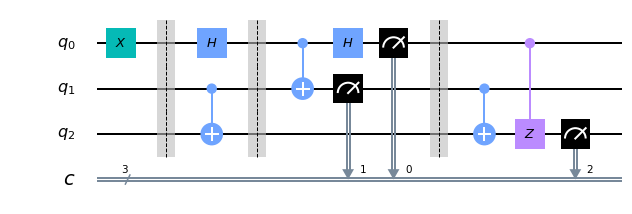

In [0]:
circuit.draw(output='mpl')

In [0]:
simulator = Aer.get_backend('qasm_simulator')
hist = execute(circuit, simulator, shots=1024)
result = hist.result().get_counts()

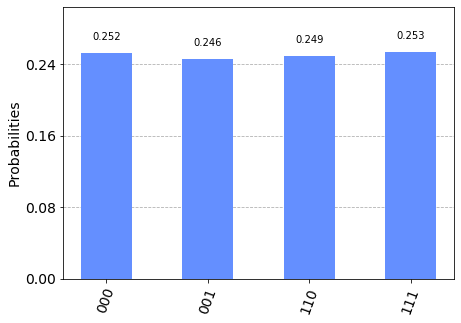

In [0]:
plot_histogram(result)

# **IBM Q Experience**

In [244]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibmqx2')

Credentials are already in use. The existing account in the session will be replaced.


In [245]:
job = execute(circuit, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

5df71387a7858900117d4761
Job Status: job is queued (25)    

KeyboardInterrupt: ignored

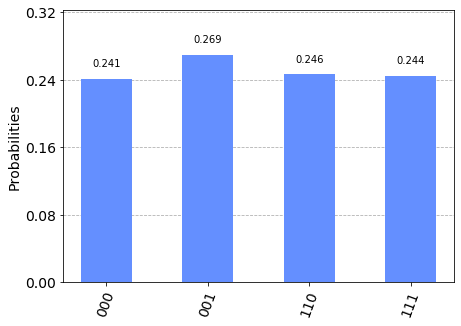

In [239]:
job_result = job.result()
plot_histogram(job_result.get_counts(circuit))

# **Conversiones**

In [0]:
analizer_states = job_result.get_counts(circuit)
print(analizer_states)

{'001': 212, '010': 12, '110': 216, '100': 13, '000': 248, '101': 17, '011': 10, '111': 296}


In [246]:
#Conversion de los valores del diccionario a valores a float
a = analizer_states
a = {k: v / total for total in (sum(a.values()),) for k, v in a.items()}
analizer_states = a

analizer_states

{'000': 0.2421875,
 '001': 0.20703125,
 '010': 0.01171875,
 '011': 0.009765625,
 '100': 0.0126953125,
 '101': 0.0166015625,
 '110': 0.2109375,
 '111': 0.2890625}

In [0]:
#Convertir a matriz
matrix_transition = np.array([list(analizer_states.values()) for item in analizer_states.values()])

#Extrayendo los estados
states = list(analizer_states.keys())

#Convertir a matrices de tipo 1D y 2D
matrix_transition = np.matrix(matrix__transition)

#Llenar matriz de estados

#Convirtiendo a float
matrix_transition = matrix_transition.astype(float)

print(matrix_transition)
print(states)

[[0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]
 [0.20703125 0.01171875 0.2109375  0.01269531 0.2421875  0.01660156
  0.00976562 0.2890625 ]]
[['001' '010' '110' '100' '000' '101' '011' '111']]


[[0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 2]]
0.140625


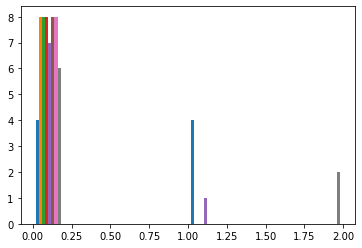

In [258]:
poisson = np.random.poisson(matrix_transition)
print(poisson)
print(np.mean(poisson))
plt.hist(poisson)
plt.show()

# **Cadenas de Markov**

In [0]:
#Generador de estados
class MarkovChainStates(object):
  def __init__(self, transition_matrix):
    self.transition_matrix = transition_matrix
    self.states = list(transition_matrix.keys())

  def next_state(self, current_state):
    return np.random.choice(self.states, p=[self.transition_matrix[current_state][next_state] for next_state in self.states])
  
  def generate_states(self, current_state, no):
    future_states = []
    for i in range(no):
      next_state = self.next_state(current_state)
      future_states.append(next_state)
      current_state = next_state
    return future_states

In [0]:
#Generador de probabilidades
class MarkovChainProbabilities(object):
  def __init__(self, transition_matrix, states, iterations):
    self.transition_matrix = transition_matrix
    self.states = states
    self.iterations = iterations
  
  def generate_probabilities(self, transition_matrix, states, iterations):
    states = self.states 
    for i in range(0, self.iterations):
      states = states * self.transition_matrix
      print(states)

In [240]:
#Analisis de Markov
mc = MarkovChainProbabilities(transition_matrix=np.matrix([[0.20703125, 0.01171875, 0.01269531 ,0.2109375, 0.2421875,  0.01660156, 0.00976562, 0.2890625],
                                                          [0.01171875, 0.2109375,  0.01269531, 0.2421875,  0.01660156, 0.00976562, 0.2890625, 0.20703125],
                                                          [0.2109375,  0.01269531, 0.2421875,  0.01660156, 0.00976562, 0.2890625, 0.20703125, 0.01171875],
                                                          [0.01269531, 0.2421875,  0.01660156, 0.00976562, 0.2890625, 0.20703125, 0.01171875, 0.2109375],
                                                          [0.2421875,  0.01660156, 0.00976562, 0.2890625, 0.20703125, 0.01171875, 0.2109375,  0.01269531],
                                                          [0.01660156, 0.00976562, 0.2890625, 0.20703125, 0.01171875, 0.2109375,  0.01269531, 0.2421875],
                                                          [0.00976562, 0.2890625, 0.20703125, 0.01171875, 0.2109375,  0.01269531, 0.2421875,  0.01660156],
                                                          [0.2890625, 0.20703125, 0.01171875, 0.2109375,  0.01269531, 0.2421875,  0.00976562, 0.01660156]]), states=np.matrix([[0,0,1,0,0,0,0,0]]), iterations = 50)
mc.generate_probabilities(transition_matrix=matrix_transition, states=states, iterations = 50)
#mc = MarkovChain(transition_matrix = matrix_transition)   
#mc.generate_states(current_state='000', no=10)

[[0.2109375  0.01269531 0.2421875  0.01660156 0.00976562 0.2890625
  0.20703125 0.01171875]]
[[0.10768985 0.07750129 0.18842125 0.11931801 0.10768985 0.14362526
  0.1120491  0.14370537]]
[[0.13556287 0.11423042 0.11741524 0.13826892 0.11313621 0.14949683
  0.11694118 0.11494831]]
[[0.12017834 0.1216011  0.10377949 0.14883129 0.12714426 0.12811637
  0.11547936 0.13486976]]
[[0.12311933 0.1290861  0.09443801 0.15105581 0.12905481 0.12663848
  0.11728436 0.12932305]]
[[0.12072615 0.13051029 0.09224506 0.15245303 0.1311317  0.12291089
  0.11833603 0.13168678]]
[[0.12093719 0.13188465 0.09091306 0.15260993 0.13159636 0.12236431
  0.11895526 0.13073918]]
[[0.1205536  0.13218331 0.09057683 0.15279524 0.13191101 0.1216972
  0.11931246 0.13097027]]
[[0.12054454 0.13243223 0.09038429 0.15278866 0.13200896 0.12155839
  0.11947428 0.13080857]]
[[0.12048113 0.13249416 0.09033304 0.15281114 0.13205784 0.12143841
  0.11956271 0.13082147]]
[[0.12047265 0.13253914 0.09030524 0.15280518 0.13207705 0.121